In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
a = pd.read_csv("/home/mmcoe/Downloads/StudentsPerformance_m.csv")

In [3]:
a.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     2
reading score                  4
writing score                  2
dtype: int64

In [4]:
a.isnull().values.sum()

8

In [5]:
a['math score'].fillna(value=a['math score'].mean(),inplace=True)

In [6]:
a.isnull().values.sum()

6

In [7]:
a['reading score'].fillna(value=a['reading score'].mean(),inplace=True)

In [8]:
a.isnull().values.sum()

2

In [9]:
a['writing score'].fillna(value=a['writing score'].mean(),inplace=True)

In [10]:
a.isnull().values.sum()

0

<AxesSubplot:xlabel='math score'>

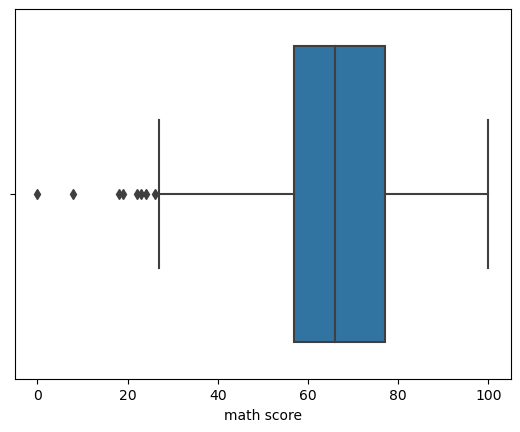

In [11]:
sns.boxplot(x=a['math score'])

<AxesSubplot:xlabel='writing score'>

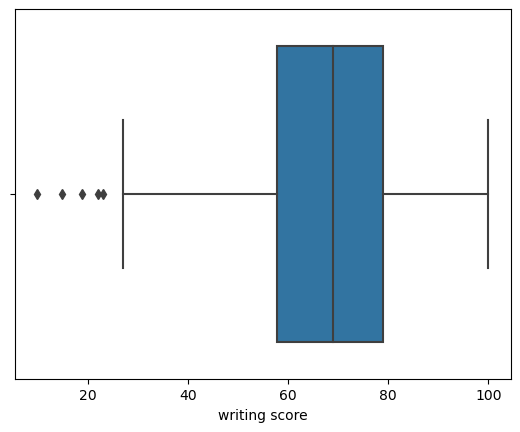

In [12]:
sns.boxplot(x=a['writing score'])

<AxesSubplot:xlabel='reading score'>

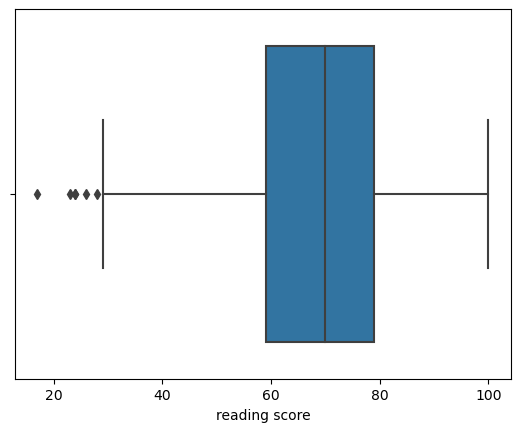

In [13]:
sns.boxplot(x=a['reading score'])

In [14]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   float64
 6   reading score                1000 non-null   float64
 7   writing score                1000 non-null   float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


<AxesSubplot:xlabel='math score', ylabel='reading score'>

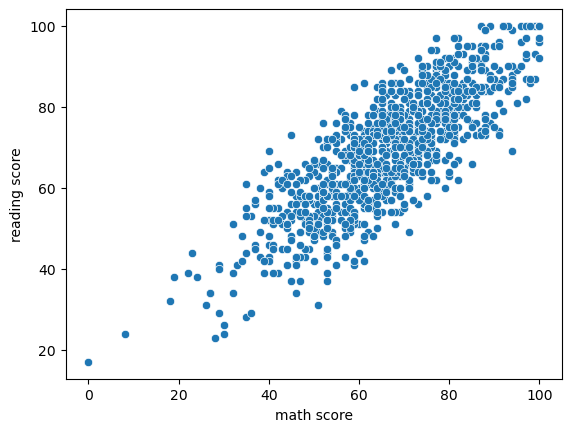

In [15]:
sns.scatterplot(data=a, x="math score", y = "reading score")

In [16]:
a

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


In [18]:
# it will calculate the Q1 
q1 = a['math score'].quantile(0.25)


In [35]:
# It will calculate the Q3 
q3 = a['math score'].quantile(0.75)

In [20]:
# IQR is Inter Quatile range.
IQR = q3-q1

In [22]:
print(IQR)

20.0


In [30]:
# It will return the values less than the Q1
a['math score']<(q1-1.5*IQR)

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: math score, Length: 1000, dtype: bool

In [31]:
# It will return the values less than the Q3
a['math score']>(q3-1.5*IQR)

0       True
1       True
2       True
3      False
4       True
       ...  
995     True
996     True
997     True
998     True
999     True
Name: math score, Length: 1000, dtype: bool

In [32]:
# It will store all the values without outliners in a2 of all columns. 
a2 = a[(a['math score']< (q1-1.5*IQR)) | (a['math score']> (q3-1.5*IQR))]


In [33]:
a2

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
5,female,group B,associate's degree,standard,none,71.0,83.0,78.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


In [34]:
a2.shape

(901, 8)

In [36]:
import scipy.stats as stats

In [57]:
# calculating value of z using stats function of scipy library. Here, abs is a absolute function which will return the positive value. abs is a function presesnt in numpt library.
z = np.abs(stats.zscore(a['writing score']))
con = np.where(z<3)
a3 = a.iloc[con]

In [54]:
a3

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


In [58]:
z

0      0.392081
1      1.314021
2      1.643285
3      1.583502
4      0.457934
         ...   
995    1.774990
996    0.859122
997    0.200594
998    0.589640
999    1.182315
Name: writing score, Length: 1000, dtype: float64

In [59]:
a3.shape

(996, 8)

<AxesSubplot:xlabel='math score'>

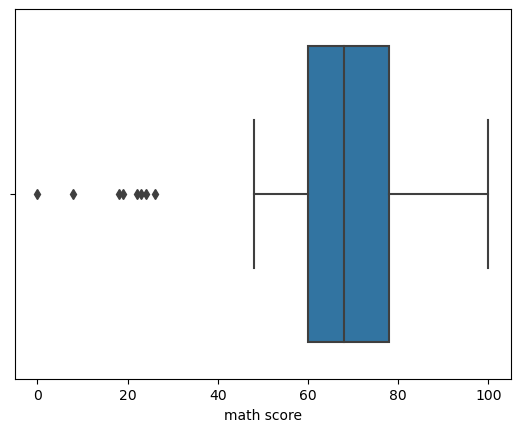

In [60]:
sns.boxplot(x=a2['math score'])

<AxesSubplot:xlabel='math score'>

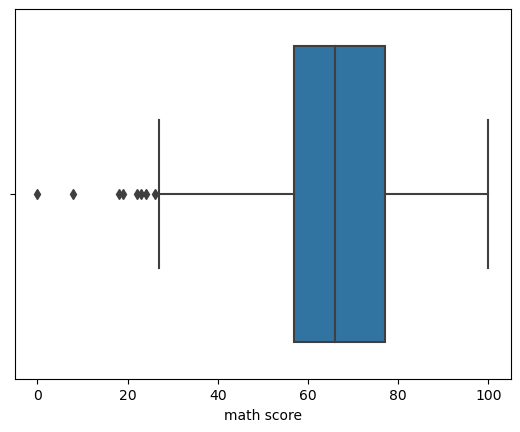

In [61]:
sns.boxplot(x=a['math score'])

In [64]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
a[['reading score']] = scaler.fit_transform(a[['reading score']])
a['reading score'] = a['reading score'].round(1)

In [65]:
a.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,0.7,74.0
1,female,group C,some college,standard,completed,69.0,0.9,88.0
2,female,group B,master's degree,standard,none,90.0,0.9,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,0.5,44.0
4,male,group C,some college,standard,none,76.0,0.7,75.0


In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(1,3))
a[['reading score']] = scaler.fit_transform(a[['reading score']])
a['reading score'] = a['reading score'].round(1)

In [67]:
a['reading score']

0      2.4
1      2.8
2      2.8
3      2.0
4      2.4
      ... 
995    3.0
996    2.0
997    2.4
998    2.4
999    2.6
Name: reading score, Length: 1000, dtype: float64